<a href="https://colab.research.google.com/github/leozinhogomes/123/blob/master/Leonardo_Louren%C3%A7o_Gomes_Trabalho_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import:

In [143]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import seaborn as sns
from termcolor import colored, cprint
import seaborn as sns
import plotly.express as px
!pip install geobr
import geobr
import geopandas as gpd
import matplotlib as mpl
import plotly.graph_objects as go


## Bases de Dados: 

###### 1- Secretaria de Agricultura, Pecuária, Pesca e Abastecimento do Estado do Rio de Janeiro : 

==> Os dados estão disponiveís no site: 

- http://www.emater.rj.gov.br/tecnica.asp

==> Arquivos modificados do banco de dados "1" utilizados no trabalho:

1:https://raw.githubusercontent.com/leozinhogomes/123/master/Faturamento%20Estado%20com%20Produ%C3%A7%C3%A3o%20de%20Culturas%20(2013-2019).csv

2:https://raw.githubusercontent.com/leozinhogomes/123/master/Cultura-Munic%C3%ADpio%20(2013-2019).csv


###### 2- Instituto Brasileiro de Economia (IBRE) - Fundação Getúlio Vargas (FGV):

==>Os dados estão disponiveís nos seguintes sites:

- https://diariofiscal.com.br/ipc_m__fgv_.htm
- https://portal-da-inflacao-ibre.fgv.br/
- http://portaldefinancas.com/ipc_m_fgv.htm

==> Arquivos modificados dos bancos de dados "2" utilizado no trabalho:

1:https://raw.githubusercontent.com/leozinhogomes/123/master/IPA-M%20(2013-2020).csv

##### 3-  IBGE

==>Os dados estão disponiveís nos seguintes sites:

- https://biblioteca.ibge.gov.br/index.php/biblioteca-catalogo?view=detalhes&id=720
- https://www.ibge.gov.br/estatisticas/sociais/rendimento-despesa-e-consumo.html
- https://www.ibge.gov.br/estatisticas/economicas/agricultura-e-pecuaria.html

==> Arquivos modificados dos bancos de dados "3" utilizado no trabalho:

1:https://raw.githubusercontent.com/leozinhogomes/123/master/Evolu%C3%A7%C3%A3o%20dos%20recursos%20no%20Sistema%20Nacional%20de%20Cr%C3%A9dito%20Rural%20-%202002-2019.csv

2:https://raw.githubusercontent.com/leozinhogomes/123/master/Financiamento%20concedidos%20SNCR%20(2019-2019).csv

##### 4 & 5-  Ministério da Agricultura & EMBRAPA

==>Os dados estão disponiveís nos seguintes sites:

- https://www.embrapa.br/agropensa/comercio-exterior-agro
- http://indicadores.agricultura.gov.br/agrostat/index.htm

==> Arquivos modificados dos bancos de dados "5" utilizado no trabalho:

1:https://raw.githubusercontent.com/leozinhogomes/123/master/Exporta%C3%A7%C3%B5es%20do%20agroneg%C3%B3cio%20por%20m%C3%AAs.csv

2:https://github.com/leozinhogomes/123/blob/master/Exporta%C3%A7%C3%B5es%20Brasileiras%20por%20diferentes%20tipos.csv

3:https://github.com/leozinhogomes/123/blob/master/Exporta%C3%A7%C3%B5es%20e%20Importa%C3%A7%C3%B5es%20Brasil%20S%C3%A9ries%20Hist%C3%B3ricas.csv

In [78]:
Evolução_do_Estado=pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Faturamento%20Culturas%20(2013-2019).csv',delimiter=";")
IPA_M = pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/IPA-M%20(2013-2020).csv',delimiter=";")
cultura_município = pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Cultura-Munic%C3%ADpio%20(2013-2019).csv',delimiter=';')
Evolução_Crédito_Rural_Nacional = pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Evolu%C3%A7%C3%A3o%20dos%20recursos%20no%20Sistema%20Nacional%20de%20Cr%C3%A9dito%20Rural%20-%202002-2019.csv',delimiter=';')
Financiamento_Nacional = pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Financiamento%20concedidos%20SNCR%20(2019-2019).csv',delimiter=';')
Séries_Históricas_Exp_Imp_Brasil=pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Exporta%C3%A7%C3%B5es%20e%20importa%C3%A7%C3%B5es%20s%C3%A9ries%20hist%C3%B3ricas%20Brasil.csv',delimiter=';')
Mês_Exp_Brasil=pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Exporta%C3%A7%C3%B5es%20do%20agroneg%C3%B3cio%20por%20m%C3%AAs.final.csv',delimiter=';')
Municipios_agro=pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Munic%C3%ADpios.csv',delimiter=';')

In [10]:
Exp_por_tipos = pd.read_csv('https://raw.githubusercontent.com/leozinhogomes/123/master/Exporta%C3%A7%C3%B5es%20Brasileiras%20por%20tipos%20s.csv',delimiter=';')

# 1) Faturamento do Estado do Rio de Janeiro com produção agrícola

#### 1.1) Crescimento do Faturamento do Estado do Rio de Janeiro por ano

In [11]:
Evolução_do_Estado.head(n=10)

,Ano,Nº PRODUTORES,PRODUÇÃO COLHIDA (t),ÁREA COLHIDA (ha),PREÇO (R$/KG),PRODUTIVIDADE (t/ha),FATURAMENTO BRUTO (R$)
0,2013,63588.0,7057669.49,206818.40,0.30,34.12,2.083492e+09
1,2014,59292.0,5884670.93,173178.22,0.33,33.98,1.913819e+09
2,2015,53401.0,3261648.25,145876.04,0.55,22.36,1.807196e+09
3,2016,52092.0,3871821.82,136061.08,0.52,28.46,2.031388e+09
4,2017,52181.0,3697073.92,134012.16,0.56,27.59,2.074283e+09
5,2018,54789.0,3965240.61,139229.11,0.55,28.48,2.161962e+09
6,2019,53492.0,3987005.54,139060.52,0.53,28.67,2.119056e+09


In [12]:
fig = px.line(Evolução_do_Estado, x='Ano', y="FATURAMENTO BRUTO (R$)",title='Crescimento do Faturamento do Estado do Rio de Janeiro por ano')

fig.show()

#### 1.2) Crescimento da Produtividade do Estado do Rio de Janeiro por ano

In [13]:
fig = px.line(Evolução_do_Estado, x='Ano', y="PRODUTIVIDADE (t/ha)",title='Crescimento da Produtividade do Estado do Rio de Janeiro por ano')

fig.show()


#### 1.3)Preço por quilo a cada ano

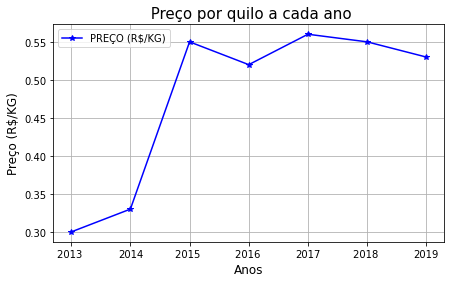

In [14]:
Evolução_do_Estado.plot(x='Ano',y='PREÇO (R$/KG)',kind='line', color='blue',marker='*',figsize=(7,4))
plt.title(' Preço por quilo a cada ano',size=(15))
plt.ylabel('Preço (R$/KG)',size=(12))
plt.xlabel('Anos',size=(12))
plt.grid(True)
plt.show()

#### 1.4)Comparação entre o Preço e a Produtividade

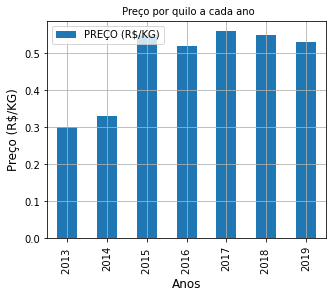

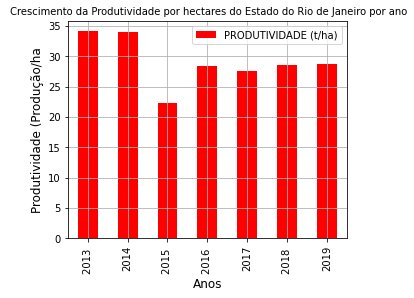

In [15]:
df=pd.DataFrame(Evolução_do_Estado,columns=['Ano','PREÇO (R$/KG)','PRODUTIVIDADE (t/ha)'])

Evolução_do_Estado.plot(x='Ano',y='PREÇO (R$/KG)',kind='bar',figsize=(5,4))
plt.title(' Preço por quilo a cada ano',size=(10))
plt.ylabel('Preço (R$/KG)',size=(12))
plt.xlabel('Anos',size=(12))
plt.grid(True)
plt.show()

Evolução_do_Estado.plot(x='Ano',y='PRODUTIVIDADE (t/ha)',kind='bar', color='red',figsize=(5,4))
plt.title(' Crescimento da Produtividade por hectares do Estado do Rio de Janeiro por ano',size=(10))
plt.ylabel('Produtividade (Produção/ha',size=(12))
plt.xlabel('Anos',size=(12))
plt.grid(True)
plt.show()

É perceptível que em 2013 tivemos uma produtividade maior que nos anos que se sucederam. Porém, nesse mesmo ano os preços foram muito baixos levando o faturamento a ser menor que em alguns períodos onde a produtividade não passou da faixa dos 34.12(t/ha). Portanto, o principal motivo de termos um faturamento maior nos anos em que a produtividade não foi alta , puxadas pela redução da areá colhida, se deve ao falto da alta dos preços.

#### 1.4)Médias e Desvios Padrões do preço e da Produtividade

In [16]:
df

,Ano,PREÇO (R$/KG),PRODUTIVIDADE (t/ha)
0,2013,0.30,34.12
1,2014,0.33,33.98
2,2015,0.55,22.36
3,2016,0.52,28.46
4,2017,0.56,27.59
5,2018,0.55,28.48
6,2019,0.53,28.67


In [17]:
print("Média:", df.mean())


Média: PREÇO (R$/KG)            0.477143
PRODUTIVIDADE (t/ha)    29.094286
dtype: float64


In [18]:
print("Desvio padrão:", df.std())

Desvio padrão: PREÇO (R$/KG)           0.111910
PRODUTIVIDADE (t/ha)    4.035285
dtype: float64


In [19]:
df.describe()

,PREÇO (R$/KG),PRODUTIVIDADE (t/ha)
count,7.000000,7.000000
mean,0.477143,29.094286
std,0.111910,4.035285
min,0.300000,22.360000
25%,0.425000,28.025000
50%,0.530000,28.480000
75%,0.550000,31.325000
max,0.560000,34.120000


# 2) IPA-M

Visando analisar qual será a previsão para os preços no mercado, vamos pegar o IPA-M que é o Índice de Preços ao Produtor Amplo-Mercado. O objetivo do IPA-M é mostrar o sobe e desce de preços de produtos agropecuários e industriais nas transações entre empresas, ou seja, feitas antes do consumo final do produto.

Este indíce é calculado mensalmente pelo IBRE/FGV e será utilizado nesse trabalho apenas para observamos qual é a previsão para os preços nesse setor no futuro.

In [20]:
IPA_M

,Mês,IPA-M do Mês,IPA-M acumulado do Ano
0,dez/13,0.63,51.233
1,nov/13,0.17,44.652
2,out/13,10.90,42.879
3,set/13,21.10,31.634
4,ago/13,0.14,10.316
...,...,...,...
87,mai/20,0.59,38.267
88,abr/20,11.20,32.177
89,mar/20,17.60,20.745
90,fev/20,-0.19,0.309


In [21]:
df2=IPA_M.query('Mês in ["dez/13","dez/14","dez/15","dez/16","dez/17","dez/18","dez/19"]')
df2

,Mês,IPA-M do Mês,IPA-M acumulado do Ano
0,dez/13,0.63,51.233
12,dez/14,0.63,21.347
24,dez/15,0.39,111.919
36,dez/16,0.69,76.270
48,dez/17,12.40,-25.448
60,dez/18,-16.70,94.176
72,dez/19,28.40,90.917


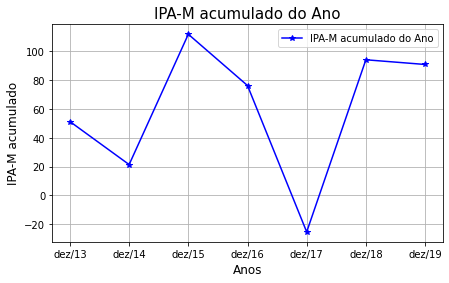

In [22]:
df2.plot(x='Mês',y='IPA-M acumulado do Ano',kind='line', color='blue',marker='*',figsize=(7,4))
plt.title('IPA-M acumulado do Ano',size=(15))
plt.ylabel('IPA-M acumulado',size=(12))
plt.xlabel('Anos',size=(12))
plt.grid(True)
plt.show()

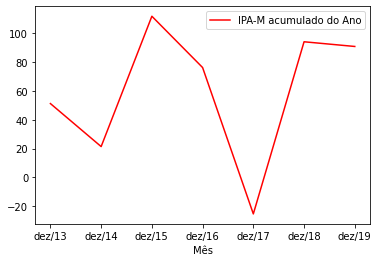

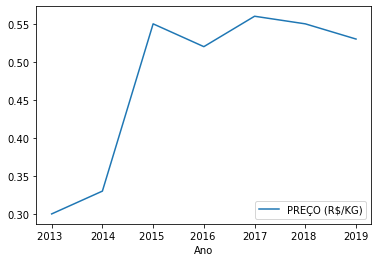

In [23]:
df2.plot(x='Mês',y='IPA-M acumulado do Ano',kind='line', color='red')
Evolução_do_Estado.plot(kind='line',x='Ano',y='PREÇO (R$/KG)')
plt.show()

É perceptível que os preços acompanharam o IPA-M.Apenas em 2017 que os preços não acompanharam o IPA-M.

In [24]:
print("Média:", df2.mean())

Média: IPA-M do Mês               3.777143
IPA-M acumulado do Ano    60.059143
dtype: float64


In [25]:
print("Desvio padrão:", df2.std())

Desvio padrão: IPA-M do Mês              13.788669
IPA-M acumulado do Ano    48.229324
dtype: float64


In [26]:
df2.describe()

,IPA-M do Mês,IPA-M acumulado do Ano
count,7.000000,7.000000
mean,3.777143,60.059143
std,13.788669,48.229324
min,-16.700000,-25.448000
25%,0.510000,36.290000
50%,0.630000,76.270000
75%,6.545000,92.546500
max,28.400000,111.919000


# 3) Cultura x Município

In [27]:
cultura_município.head()

,MUNICIPIOS,Cultura,Tipo,Ano,Nº PRODUTORES,PRODUÇÃO COLHIDA (t),ÁREA COLHIDA (ha),PREÇO (R$/KG),PRODUTIVIDADE (t/ha),FATURAMENTO BRUTO(R$)
0,Duas Barras,Abacate,Fruticultura,2019,27.0,23.6,1.4,14697.0,16.86,34.685.00
1,Rio de Janeiro,Abacate,Fruticultura,2019,28.0,122.19,16.18,11493.0,7.55,140.429.40
2,Trajano de Morais,Abacate,Fruticultura,2019,10.0,30.00,2.00,1.6,15.00,48.000.00
3,Varre-Sai,Abacate,Fruticultura,2019,1.0,21.00,9.00,2.0,2.33,42.000.00
4,Cachoeiras de Macacu,Abacaxi,Fruticultura,2019,2.0,22.5,0.8,0.8,28.13,18.000.00


In [28]:
cultura_município.shape

(1076, 10)

In [29]:
cultura_município.describe()

,Ano,Nº PRODUTORES,PREÇO (R$/KG),PRODUTIVIDADE (t/ha)
count,1076.0,1076.000000,1076.000000,1076.000000
mean,2019.0,47.154275,15412.764195,19.154396
std,0.0,101.136851,20508.189828,15.805321
min,2019.0,1.000000,0.050000,0.260000
25%,2019.0,4.000000,2.000000,9.527500
50%,2019.0,15.000000,13192.000000,14.745000
75%,2019.0,44.000000,20673.250000,23.155000
max,2019.0,1427.000000,265873.000000,113.000000


In [30]:
cultura_município.sort_values(by=['FATURAMENTO BRUTO(R$)'], na_position='first')

,MUNICIPIOS,Cultura,Tipo,Ano,Nº PRODUTORES,PRODUÇÃO COLHIDA (t),ÁREA COLHIDA (ha),PREÇO (R$/KG),PRODUTIVIDADE (t/ha),FATURAMENTO BRUTO(R$)
324,Varre-Sai,Feijão,Grãos,2019,160.0,300.00,267.00,33333.0000,1.12,1.000.000.00
386,Sumidouro,Bertalha,Olerícolas Folhas,2019,10.0,425.00,21.25,23567.0000,20.00,1.001.600.00
772,Angra dos Reis,Quiabo,Olerícolas Frutas,2019,33.0,230.5,16.5,43492.0000,13.97,1.002.500.00
458,Sapucaia,Couve Flor,Olerícolas Folhas,2019,36.0,1.260.00,36.00,0.7972,35.00,1.004.500.00
868,Duas Barras,Vagem,Olerícolas Frutas,2019,60.0,439.8,26.6,22973.0000,16.53,1.010.340.00
...,...,...,...,...,...,...,...,...,...,...
654,Rio Claro,Jiló,Olerícolas Frutas,2019,3.0,104.8,7.1,0.9471,14.76,99.254.00
376,Três Rios,Alface,Olerícolas Folhas,2019,1.0,50.55,3.18,19692.0000,15.90,99.542.20
484,Teresópolis,Rúcula,Olerícolas Folhas,2019,56.0,283.00,24.1,34982.0000,11.74,990.000.00
162,Duque de Caxias,Goiaba,Fruticultura,2019,9.0,402.00,24.4,24649.0000,16.48,990.900.00


In [31]:
pd.crosstab(cultura_município["MUNICIPIOS"],cultura_município["Cultura"],margins=True)

Cultura,Abacate,Abacaxi,Abobora,Abobrinha,Acerola,Agrião,Aipim,Alface,Alface*,Alho Porró,Arroz,Banana,Banana Nanica,Banana Prata,Batata,Batata Doce,Berinjela,Bertalha,Beterraba,Brócolis,Café,Caju,Cana Cachaça,Cana Caldo,Cana Forrageira,Caqui,Cará,Cebolinha,Cenoura,Chicória,Chuchu,Coco Verde,Coentro,Couve,Couve Flor,Ervilha,Espinafre,Feijão,Feijão Guandu,Feijão Mauá,Figo,Goiaba,Graviola,Inhame,Jiló,Laranja,Limão,Lixia,Louro,Mandioca,Maracujá,Maxixe,Melancia,Milho,Milho Forrageiro,Milho Verde,Morango,Nabo,Palmito,Pepino,Pessego,Pimenta,Pimentão,Pinha,Quiabo,Repolho,Rúcula,Rúcula*,Salsa,Tangerina,Tangerina Poncã,Tomate,Tomate Cereja,Tomate*,Uva,Vagem,Vagem Francesa,All
MUNICIPIOS,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Angra dos Reis,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7
Aperibé,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,13
Araruama,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,12
Areal,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4
Armação dos Búzios,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valença,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,13
Varre-Sai,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,17
Vassouras,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,15


In [32]:
cultura_município.loc[4:8]

,MUNICIPIOS,Cultura,Tipo,Ano,Nº PRODUTORES,PRODUÇÃO COLHIDA (t),ÁREA COLHIDA (ha),PREÇO (R$/KG),PRODUTIVIDADE (t/ha),FATURAMENTO BRUTO(R$)
4,Cachoeiras de Macacu,Abacaxi,Fruticultura,2019,2.0,22.5,0.8,0.8,28.13,18.000.00
5,Campos dos Goytacases,Abacaxi,Fruticultura,2019,197.0,4.710.00,242.00,13866.0,19.46,6.530.750.00
6,São Francisco de Itabapoana,Abacaxi,Fruticultura,2019,409.0,101.780.00,4.056.00,11704.0,25.09,119.120.000.00
7,São João da Barra,Abacaxi,Fruticultura,2019,141.0,9.371.00,304.00,16156.0,30.83,15.139.890.00
8,São Pedro da Aldeia,Abacaxi,Fruticultura,2019,2.0,49.00,2.25,19347.0,21.78,94.800.00


In [33]:
def Proc_Cultura(cultura):
    x = cultura_município.set_index('Cultura')
    return x.loc[[cultura]]

def Proc_Tipo(Tipo):
    y = cultura_município.set_index('Tipo')
    return y.loc[[Tipo]]

def Proc_Produtividade_maior_que(Produtividade):
    x = cultura_município.set_index('Cultura')
    z = x.loc[x['PRODUTIVIDADE    (t/ha)'] > Produtividade]
    return z

In [34]:
Proc_Cultura('Abacate')

,MUNICIPIOS,Tipo,Ano,Nº PRODUTORES,PRODUÇÃO COLHIDA (t),ÁREA COLHIDA (ha),PREÇO (R$/KG),PRODUTIVIDADE (t/ha),FATURAMENTO BRUTO(R$)
Cultura,,,,,,,,,
Abacate,Duas Barras,Fruticultura,2019,27.0,23.6,1.4,14697.0,16.86,34.685.00
Abacate,Rio de Janeiro,Fruticultura,2019,28.0,122.19,16.18,11493.0,7.55,140.429.40
Abacate,Trajano de Morais,Fruticultura,2019,10.0,30.00,2.00,1.6,15.00,48.000.00
Abacate,Varre-Sai,Fruticultura,2019,1.0,21.00,9.00,2.0,2.33,42.000.00


In [35]:
Proc_Cultura('Banana')

,MUNICIPIOS,Tipo,Ano,Nº PRODUTORES,PRODUÇÃO COLHIDA (t),ÁREA COLHIDA (ha),PREÇO (R$/KG),PRODUTIVIDADE (t/ha),FATURAMENTO BRUTO(R$)
Cultura,,,,,,,,,
Banana,Angra dos Reis,Fruticultura,2019,33.0,204.00,26.5,3.5000,7.70,714.000.00
Banana,Areal,Fruticultura,2019,2.0,48.34,6.27,17286.0000,7.71,83.559.60
Banana,Barra do Pirai,Fruticultura,2019,6.0,71.65,6.00,2964.0000,11.94,212.369.00
Banana,Cambuci,Fruticultura,2019,30.0,778.00,40.00,13465.0000,19.45,1.047.550.00
Banana,Casimiro de Abreu,Fruticultura,2019,112.0,1.690.00,180.00,12379.0000,9.39,2.092.000.00
Banana,Comendador Levy Gasparian,Fruticultura,2019,3.0,48.39,6.2,1689.0000,7.80,81.730.80
Banana,Conceição de Macabu,Fruticultura,2019,17.0,113.00,12.5,21615.0000,9.04,244.250.00
Banana,Guapimirim,Fruticultura,2019,40.0,1.196.00,167.00,15568.0000,7.16,1.861.900.00
Banana,Itaboraí,Fruticultura,2019,14.0,302.26,27.9,0.9883,10.83,298.710.00


In [36]:
Proc_Tipo('Fruticultura')

,MUNICIPIOS,Cultura,Ano,Nº PRODUTORES,PRODUÇÃO COLHIDA (t),ÁREA COLHIDA (ha),PREÇO (R$/KG),PRODUTIVIDADE (t/ha),FATURAMENTO BRUTO(R$)
Tipo,,,,,,,,,
Fruticultura,Duas Barras,Abacate,2019,27.0,23.6,1.4,14697.00,16.86,34.685.00
Fruticultura,Rio de Janeiro,Abacate,2019,28.0,122.19,16.18,11493.00,7.55,140.429.40
Fruticultura,Trajano de Morais,Abacate,2019,10.0,30.00,2.00,1.60,15.00,48.000.00
Fruticultura,Varre-Sai,Abacate,2019,1.0,21.00,9.00,2.00,2.33,42.000.00
Fruticultura,Cachoeiras de Macacu,Abacaxi,2019,2.0,22.5,0.8,0.80,28.13,18.000.00
...,...,...,...,...,...,...,...,...,...
Fruticultura,Paraíba do Sul,Uva,2019,1.0,1.6,1.8,9.00,0.89,14.400.00
Fruticultura,Rio das Ostras,Uva,2019,1.0,3.00,0.6,10.75,5.00,32.250.00
Fruticultura,São Fidélis,Uva,2019,2.0,11.2,0.8,104442.00,14.00,116.974.80


In [65]:
mun = geobr.read_municipality(code_muni="RJ")
mun

,code_muni,name_muni,code_state,abbrev_state,geometry
0,3300100.0,Angra Dos Reis,33,RJ,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33207..."
1,3300159.0,Aperibé,33,RJ,"POLYGON ((-42.08950 -21.62893, -42.08735 -21.6..."
2,3300209.0,Araruama,33,RJ,"POLYGON ((-42.22526 -22.59253, -42.21905 -22.5..."
3,3300225.0,Areal,33,RJ,"POLYGON ((-43.16007 -22.20005, -43.15906 -22.1..."
4,3300233.0,Armação Dos Búzios,33,RJ,"MULTIPOLYGON (((-41.98427 -22.74458, -41.97215..."
...,...,...,...,...,...
87,3306008.0,Três Rios,33,RJ,"POLYGON ((-43.13666 -22.10933, -43.12743 -22.1..."
88,3306107.0,Valença,33,RJ,"POLYGON ((-43.82120 -22.08844, -43.81871 -22.0..."
89,3306156.0,Varre-Sai,33,RJ,"POLYGON ((-41.82695 -20.84164, -41.82496 -20.8..."
90,3306206.0,Vassouras,33,RJ,"POLYGON ((-43.61208 -22.30841, -43.60610 -22.3..."


In [79]:
Municipios_agro.head()

,code_muni,name_muni,Nº PRODUTORES em 2019,PRODUÇÃO COLHIDA (t) em 2019,ÁREA COLHIDA (ha) em 2019,PRODUTIVIDADE (t/ha) em 2019,FATURAMENTO BRUTO (R$) em 2019,Nº PRODUTORES em 2018,PRODUÇÃO COLHIDA (t) em 2018,ÁREA COLHIDA (ha) em 2018,PREÇO (R$/KG) em 2018,PRODUTIVIDADE (t/ha) em 2018,FATURAMENTO BRUTO (R$) em 2018,Nº PRODUTORES em 2017,PRODUÇÃO (t) em 2017,ÁREA (ha) em 2017,PRODUTIVIDADE (t/ha) em 2017,FATURAMENTO (R$) em 2017,Nº PRODUTORES em 2016,PRODUÇÃO (t) em 2016,ÁREA (ha) em 2016,PRODUTIVIDADE (t/ha) em 2016,FATURAMENTO (R$) em 2016
0,3300100,Angra dos Reis,261,1905.00,200.00,9.53,14230750.0,674,4284.00,510.50,52.2790,8.39,22396500.0,629,3895.00,531.50,7.33,23020250.0,312,2828.00,376.90,7.50,20645000.0
1,3300159,Aperibé,179,2364.00,159.50,14.82,4290600.0,222,2647.00,173.00,1.1870,15.30,3141900.0,202,2305.00,143.00,16.12,2970900.0,228,2725.50,143.00,19.06,2635525.0
2,3300209,Araruama,479,262653.15,6300.45,41.69,72549292.5,463,236006.80,6009.60,0.2920,39.27,68923590.0,438,192792.40,5077.00,37.97,59354350.0,393,188482.70,5057.50,37.27,63106445.0
3,3300225,Areal,10,189.65,15.77,12.03,265972.7,9,658.76,29.50,0.6083,22.33,400698.9,11,605.55,26.20,23.11,616071.5,10,219.11,11.75,18.65,305947.9
4,3300233,Armação dos Búzios,76,188.51,17.91,10.53,479026.0,69,189.20,16.52,24.7570,11.45,468395.0,52,157.90,14.32,11.03,334385.0,55,203.41,16.48,12.34,450525.0


In [84]:
df_geobr= mun.merge(Municipios_agro, on = 'code_muni', how = 'right')
df_geobr=df_geobr.drop('name_muni_y',axis=1)
df_geobr = gpd.GeoDataFrame(df_geobr, geometry="geometry")
df_geobr.head()


,code_muni,name_muni_x,code_state,abbrev_state,geometry,Nº PRODUTORES em 2019,PRODUÇÃO COLHIDA (t) em 2019,ÁREA COLHIDA (ha) em 2019,PRODUTIVIDADE (t/ha) em 2019,FATURAMENTO BRUTO (R$) em 2019,Nº PRODUTORES em 2018,PRODUÇÃO COLHIDA (t) em 2018,ÁREA COLHIDA (ha) em 2018,PREÇO (R$/KG) em 2018,PRODUTIVIDADE (t/ha) em 2018,FATURAMENTO BRUTO (R$) em 2018,Nº PRODUTORES em 2017,PRODUÇÃO (t) em 2017,ÁREA (ha) em 2017,PRODUTIVIDADE (t/ha) em 2017,FATURAMENTO (R$) em 2017,Nº PRODUTORES em 2016,PRODUÇÃO (t) em 2016,ÁREA (ha) em 2016,PRODUTIVIDADE (t/ha) em 2016,FATURAMENTO (R$) em 2016
0,3300100.0,Angra Dos Reis,33,RJ,"MULTIPOLYGON (((-44.33208 -23.02384, -44.33207...",261,1905.00,200.00,9.53,14230750.0,674,4284.00,510.50,52.2790,8.39,22396500.0,629,3895.00,531.50,7.33,23020250.0,312,2828.00,376.90,7.50,20645000.0
1,3300159.0,Aperibé,33,RJ,"POLYGON ((-42.08950 -21.62893, -42.08735 -21.6...",179,2364.00,159.50,14.82,4290600.0,222,2647.00,173.00,1.1870,15.30,3141900.0,202,2305.00,143.00,16.12,2970900.0,228,2725.50,143.00,19.06,2635525.0
2,3300209.0,Araruama,33,RJ,"POLYGON ((-42.22526 -22.59253, -42.21905 -22.5...",479,262653.15,6300.45,41.69,72549292.5,463,236006.80,6009.60,0.2920,39.27,68923590.0,438,192792.40,5077.00,37.97,59354350.0,393,188482.70,5057.50,37.27,63106445.0
3,3300209.0,Araruama,33,RJ,"POLYGON ((-42.22526 -22.59253, -42.21905 -22.5...",152,5638.35,322.34,17.49,9750639.6,154,4999.21,285.98,18.2110,17.48,9104213.5,164,5469.22,280.17,19.52,9244336.5,162,4665.99,233.70,19.97,7812864.0
4,3300225.0,Areal,33,RJ,"POLYGON ((-43.16007 -22.20005, -43.15906 -22.1...",10,189.65,15.77,12.03,265972.7,9,658.76,29.50,0.6083,22.33,400698.9,11,605.55,26.20,23.11,616071.5,10,219.11,11.75,18.65,305947.9


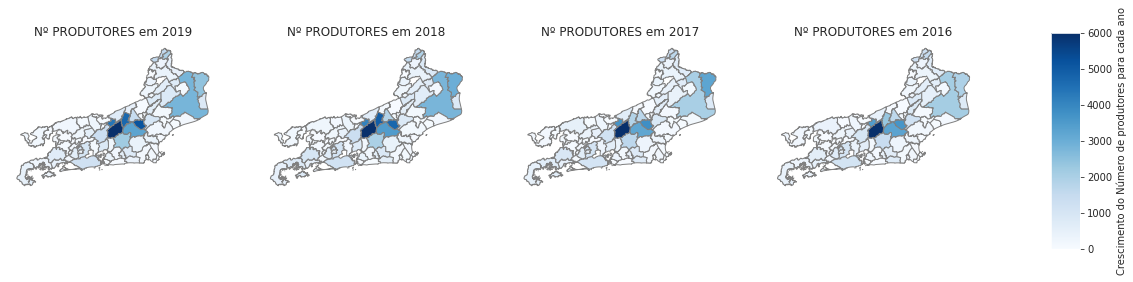

In [113]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, sharey = True, figsize = (20,12))

for i in range(len(ax)):
  ax[i].axis('off')

cm = mpl.cm.Blues

norm = mpl.colors.Normalize(vmin=0, vmax=6000)

cax = fig.add_axes([0.85, 0.35, 0.02, 0.25])

fig.subplots_adjust(right=0.8)

ax[0].set_title('Nº PRODUTORES em 2019')
ax[1].set_title('Nº PRODUTORES em 2018')
ax[2].set_title('Nº PRODUTORES em 2017')
ax[3].set_title('Nº PRODUTORES em 2016')


df_geobr.plot(column = 'Nº PRODUTORES  em 2019', ax = ax[0], cmap = 'Blues', edgecolor = 'grey')
df_geobr.plot(column = 'Nº PRODUTORES  em 2018', ax = ax[1], cmap = 'Blues', edgecolor = 'grey')
df_geobr.plot(column = 'Nº PRODUTORES  em 2017', ax = ax[2], cmap = 'Blues', edgecolor = 'grey')
df_geobr.plot(column = 'Nº PRODUTORES em 2016 ', ax = ax[3], cmap = 'Blues', edgecolor = 'grey')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm), cax=cax, label='Crescimento do Número de produtores para cada ano')

#colocar uma barra de cor
#olhar vmax e vmin

plt.show()

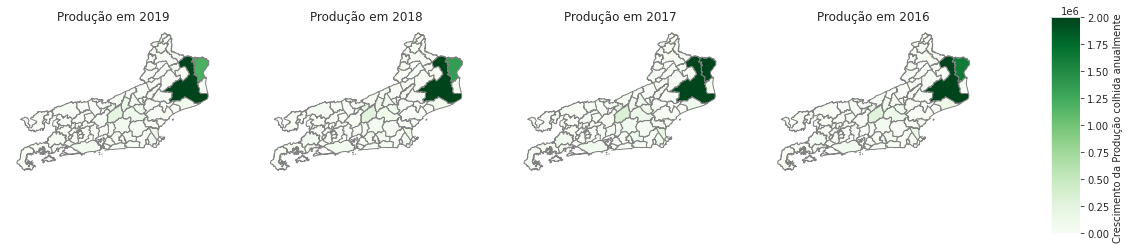

In [119]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, sharey = True, figsize = (20,12))

for i in range(len(ax)):
  ax[i].axis('off')

cm = mpl.cm.Greens

norm = mpl.colors.Normalize(vmin=0, vmax=2000000)

cax = fig.add_axes([0.85, 0.35, 0.02, 0.25])

fig.subplots_adjust(right=0.8)

ax[0].set_title('Produção em 2019')
ax[1].set_title('Produção em 2018')
ax[2].set_title('Produção em 2017')
ax[3].set_title('Produção em 2016')


df_geobr.plot(column = 'PRODUÇÃO COLHIDA               (t) em 2019', ax = ax[0], cmap = 'Greens', edgecolor = 'grey')
df_geobr.plot(column = 'PRODUÇÃO COLHIDA               (t) em 2018', ax = ax[1], cmap = 'Greens', edgecolor = 'grey')
df_geobr.plot(column = 'PRODUÇÃO (t)  em 2017', ax = ax[2], cmap = 'Greens', edgecolor = 'grey')
df_geobr.plot(column = 'PRODUÇÃO (t) em 2016 ', ax = ax[3], cmap = 'Greens', edgecolor = 'grey')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm), cax=cax, label='Crescimento da Produção colhida anualmente ')


plt.show()

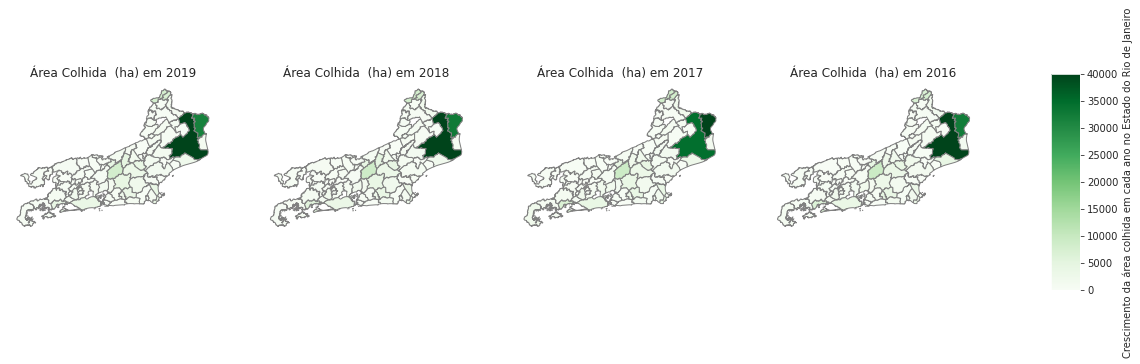

In [121]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, sharey = True, figsize = (20,12))

for i in range(len(ax)):
  ax[i].axis('off')

cm = mpl.cm.Greens

norm = mpl.colors.Normalize(vmin=0, vmax=40000)

cax = fig.add_axes([0.85, 0.35, 0.02, 0.25])

fig.subplots_adjust(right=0.8)

ax[0].set_title('Área Colhida  (ha) em 2019')
ax[1].set_title('Área Colhida  (ha) em 2018')
ax[2].set_title('Área Colhida  (ha) em 2017')
ax[3].set_title('Área Colhida  (ha) em 2016')


df_geobr.plot(column = 'ÁREA COLHIDA  (ha)  em 2019', ax = ax[0], cmap = 'Greens', edgecolor = 'grey')
df_geobr.plot(column = 'ÁREA COLHIDA  (ha)  em 2018', ax = ax[1], cmap = 'Greens', edgecolor = 'grey')
df_geobr.plot(column = 'ÁREA (ha)  em 2017', ax = ax[2], cmap = 'Greens', edgecolor = 'grey')
df_geobr.plot(column = 'ÁREA (ha)  em 2016', ax = ax[3], cmap = 'Greens', edgecolor = 'grey')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm), cax=cax, label='Crescimento da área colhida em cada ano no Estado do Rio de Janeiro')


plt.show()

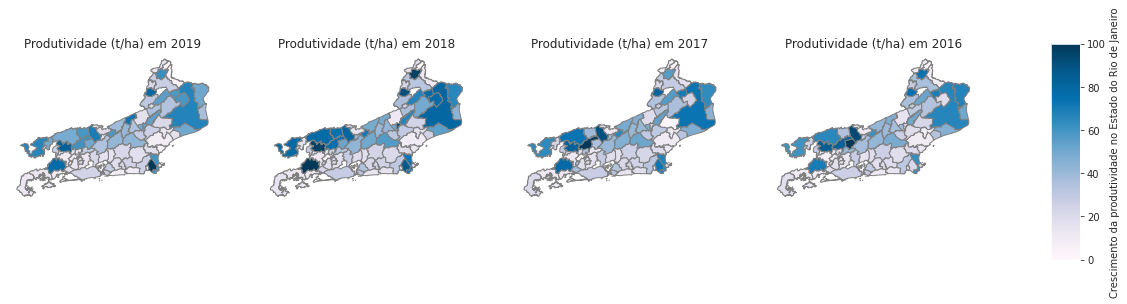

In [130]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, sharey = True, figsize = (20,12))

for i in range(len(ax)):
  ax[i].axis('off')

cm = mpl.cm.PuBu
norm = mpl.colors.Normalize(vmin=0, vmax=100)

cax = fig.add_axes([0.85, 0.35, 0.02, 0.25])

fig.subplots_adjust(right=0.8)

ax[0].set_title('Produtividade (t/ha) em 2019')
ax[1].set_title('Produtividade (t/ha) em 2018')
ax[2].set_title('Produtividade (t/ha) em 2017')
ax[3].set_title('Produtividade (t/ha) em 2016')


df_geobr.plot(column = 'PRODUTIVIDADE (t/ha) em 2019', ax = ax[0], cmap = 'PuBu', edgecolor = 'grey')
df_geobr.plot(column = 'PRODUTIVIDADE (t/ha) em 2018', ax = ax[1], cmap = 'PuBu', edgecolor = 'grey')
df_geobr.plot(column = 'PRODUTIVIDADE (t/ha)  em 2017', ax = ax[2], cmap = 'PuBu', edgecolor = 'grey')
df_geobr.plot(column = 'PRODUTIVIDADE (t/ha)  em 2016', ax = ax[3], cmap = 'PuBu', edgecolor = 'grey')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm), cax=cax, label='Crescimento da produtividade no Estado do Rio de Janeiro')


plt.show()

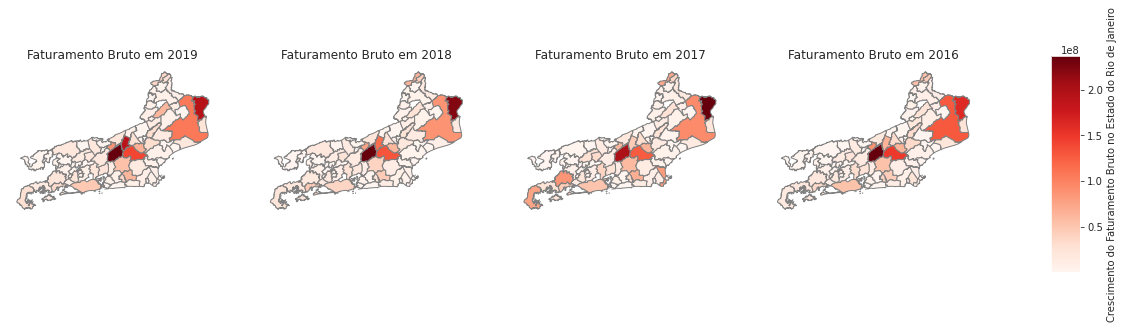

In [139]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, sharey = True, figsize = (20,12))

for i in range(len(ax)):
  ax[i].axis('off')

cm = mpl.cm.Reds
norm = mpl.colors.Normalize(vmin=100000, vmax=236530276)

cax = fig.add_axes([0.85, 0.35, 0.02, 0.25])

fig.subplots_adjust(right=0.8)

ax[0].set_title('Faturamento Bruto em 2019')
ax[1].set_title('Faturamento Bruto em 2018')
ax[2].set_title('Faturamento Bruto em 2017')
ax[3].set_title('Faturamento Bruto em 2016')


df_geobr.plot(column = 'FATURAMENTO BRUTO (R$) em 2019', ax = ax[0], cmap = 'Reds', edgecolor = 'grey')
df_geobr.plot(column = 'FATURAMENTO BRUTO (R$) em 2018', ax = ax[1], cmap = 'Reds', edgecolor = 'grey')
df_geobr.plot(column = 'FATURAMENTO (R$) em 2017', ax = ax[2], cmap = 'Reds', edgecolor = 'grey')
df_geobr.plot(column = 'FATURAMENTO (R$) em 2016', ax = ax[3], cmap = 'Reds', edgecolor = 'grey')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm), cax=cax, label='Crescimento do Faturamento Bruto no Estado do Rio de Janeiro')


plt.show()

In [205]:
fig = px.scatter(df_geobr, x="FATURAMENTO BRUTO (R$) em 2019", y="PRODUTIVIDADE (t/ha) em 2019", color="FATURAMENTO BRUTO (R$) em 2019",size='PRODUTIVIDADE (t/ha) em 2019', hover_data=['FATURAMENTO BRUTO (R$) em 2019','name_muni_x'])
fig.show()

In [204]:
fig = px.scatter(df_geobr, x="PRODUTIVIDADE (t/ha) em 2019", y="ÁREA COLHIDA  (ha)  em 2019",color="PRODUTIVIDADE (t/ha) em 2019",log_y=True,opacity=1,hover_data=['FATURAMENTO BRUTO (R$) em 2019','name_muni_x'],trendline='ols', trendline_color_override='blue')
fig.show()

# **4) Crédito Rural**




Aqui serão
apresentados dados estatísticos dos
financiamentos do Sistema Nacional de
Crédito Rural - SNCR, do Ministério da
Agricultura, Pecuária e Abastecimento.
Considera-se crédito rural o suprimento
de recursos financeiros pelas instituições
integrantes do SNCR, para aplicação
exclusiva nas finalidades e condições
estabelecidas no Manual de crédito
rural  - MCR, elaborado pelo Banco
Central do Brasil - BCB.


#### **4.1 - Evolução do Crédito Rural Nacional ao longo dos anos**




In [37]:
Evolução_Crédito_Rural_Nacional

,Ano,Valores Correntes (em Reais)
0,2002,23341792244
1,2003,31789054311
2,2004,42091743013
3,2005,43112372624
4,2006,45460995377
5,2007,52728569911
6,2008,66128422438
7,2009,74096178017
8,2010,82371758565
9,2011,93563090746


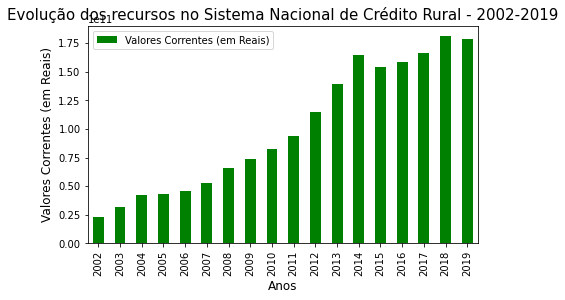

In [38]:
Evolução_Crédito_Rural_Nacional.plot(x='Ano',y='Valores Correntes (em Reais)',kind='bar', color='green',figsize=(7,4))
plt.title('Evolução dos recursos no Sistema Nacional de Crédito Rural - 2002-2019',size=(15))
plt.ylabel('Valores Correntes (em Reais)',size=(12))
plt.xlabel('Anos',size=(12))
plt.show()


#### **4.2 - Como é distribuido o Crédito Rural no Território Nacional**

In [39]:
Financiamento_Nacional

,Tipo,Contratos em 2018,Contratos p/ Custeio (2018),Contratos p/ Investimentos (2018),Contratos p/ Comercialização (2018),Contratos p/ Industrialização(2018),Contratos em 2019,Contratos p/ Custeio (2019),Contratos p/ Investimentos (2019),Contratos p/ Comercialização (2019),Contratos p/ Industrialização(2019),Valores 2018 (em R$),Valores 2019 (em R$)
0,Bancos Privados,100095,66155,64483,5545,828,64735,30715,60609,4143,593,36080485477,34780126927
1,Bancos Públicos,534242,501949,1038533,18653,356,493715,470834,926959,18005,299,66073116595,59990396111
2,Bancos de Desenvolvimento e Agências de Formento,3720,28,4741,86,421,1997,0,2693,85,3,1847508576,2724838042
3,Cooperativas de Crédito,346433,293024,47911,5447,51,349485,294192,49275,5899,119,27795637635,32031371687


In [40]:
x = Financiamento_Nacional.set_index('Tipo')
B_privados=x.loc[['Bancos Privados']]
B_Públicos=x.loc[['Bancos Públicos']]
B_Desenvolvimento=x.loc[['Bancos de Desenvolvimento e Agências de Formento']]
C_Crédito=x.loc[['Cooperativas de Crédito']]

B_privados

,Contratos em 2018,Contratos p/ Custeio (2018),Contratos p/ Investimentos (2018),Contratos p/ Comercialização (2018),Contratos p/ Industrialização(2018),Contratos em 2019,Contratos p/ Custeio (2019),Contratos p/ Investimentos (2019),Contratos p/ Comercialização (2019),Contratos p/ Industrialização(2019),Valores 2018 (em R$),Valores 2019 (em R$)
Tipo,,,,,,,,,,,,
Bancos Privados,100095,66155,64483,5545,828,64735,30715,60609,4143,593,36080485477,34780126927


###### **4.2.1 - Distribuição dos diferentes agentes de crédito**


In [41]:
fig = px.pie(Financiamento_Nacional, values='Valores 2018 (em R$)', names='Tipo', title='Financiamento concedido a produtores e cooperativas - 2018 (em R$)')
fig.show()

fig = px.pie(Financiamento_Nacional, values='Valores 2019 (em R$)', names='Tipo', title='Financiamento concedido a produtores e cooperativas - 2019 (em R$)')
fig.show()

###### **4.2.2 - Distribuição dos diferentes tipos de Contrato**

- Custeio

In [42]:
fig = px.pie(Financiamento_Nacional, values='Contratos p/ Custeio (2018)', names='Tipo', title='Distribuição de Contratos para Custeio em 2018')
fig.show()


fig = px.pie(Financiamento_Nacional, values='Contratos p/ Custeio (2019)', names='Tipo', title='Distribuição de Contratos para Custeio em 2019')
fig.show()

- Investimento

In [43]:
fig = px.pie(Financiamento_Nacional, values='Contratos p/ Investimentos (2018)', names='Tipo', title='Distribuição de Contratos para Investimentos no setor agrícola em 2018')
fig.show()

fig = px.pie(Financiamento_Nacional, values='Contratos p/ Investimentos (2019)', names='Tipo', title='Distribuição de Contratos para Investimentos no setor agrícola em 2019')
fig.show()

- Comercialização

In [44]:
fig = px.pie(Financiamento_Nacional, values='Contratos p/ Comercialização (2018)', names='Tipo', title='Distribuição de Contratos para Comercialização de produtos agrícolas em 2018')
fig.show()

fig = px.pie(Financiamento_Nacional, values='Contratos p/ Comercialização (2019)', names='Tipo', title='Distribuição de Contratos para Comercialização de produtos agrícolas em 2019')
fig.show()

- Industrialização

In [45]:
fig = px.pie(Financiamento_Nacional, values='Contratos p/ Industrialização(2018)', names='Tipo', title='Distribuição de Contratos para Industrialização no setor agrícola em 2018')
fig.show()


fig = px.pie(Financiamento_Nacional, values='Contratos p/ Industrialização(2019)', names='Tipo', title='Distribuição de Contratos para Industrialização no setor agrícola em 2019')
fig.show()

# **5) A Agricultura Familiar no Estado do Rio de Janeiro**

### Agricultura Familiar:

- Trabalho e gestão intimamente relacionados.
 
- Direção do processo produtivo diretamente assegurada pelos proprietários ou arrendatários.

- Ênfase na diversificação.

- Ênfase na durabilidade dos recursos e na qualidade de vida.

- Trabalho assalariado complementar.

- Decisões imediatas, adequadas ao alto grau de imprevisibilidade do processo produtivo. 

O peso da produção familiar na agricultura faz dela hoje um setor único no
capitalismo contemporâneo: não há atividade econômica em que o trabalho e a gestão
estruturem-se tão fortemente em torno de vínculos de parentesco e onde a participação de
mão-de-obra não contratada seja tão importante (Abramovay, 1998). 

#### **5.1 - PRONAF**

# **6) Exportações e Importações Agrícolas no Brasil**

 #### **6.1 - Exportações por diferentes tipos:**

In [140]:
Exp_por_tipos

,UF,Exportações por UF,Mercados,Exportações por Mercado,Setores,Exportações por Setores
0,MATO GROSSO,18,CHINA,36,COMPLEXO SOJA,39
1,SAO PAULO,17,UNIÃO EUROPEIA 28 - UE 28,16,CARNES,16
2,PARANA,13,ESTADOS UNIDOS,7,PRODUTOS FLORESTAIS,11
3,RIO GRANDE DO SUL,10,JAPAO,2,COMPLEXO SUCROALCOOLEIRO,9
4,MINAS GERAIS,8,COREIA.REP.SUL,2,CEREAIS. FARINHAS E PREPARAÇÕES,6
5,Outros,34,Outros,37,Outros,18


##### **6.1.1 - Exportações Brasileiras do Agronegócio por UF em 2020**

In [47]:
fig = px.pie(Exp_por_tipos, values=' Exportações por UF', names='UF', title='Exportações Brasileiras do Agronegócio por UF em 2020')
fig.show()


##### **6.1.2 - Exportações Brasileiras do Agronegócio por Mercados em 2020**

In [48]:
fig = px.pie(Exp_por_tipos, values='Exportações por Mercado', names='Mercados', title='Exportações Brasileiras do Agronegócio por Mercados em 2020')
fig.show()

##### **6.1.3 - Exportações Brasileiras do Agronegócio por Setores em 2020**

In [49]:
fig = px.pie(Exp_por_tipos, values='Exportações  por Setores ', names=' Setores', title='Exportações Brasileiras do Agronegócio por Setores em 2020')
fig.show()

#### **6.2 - Séries Históricas Exportações e Importações Agrícolas Brasileiras (1997-2020)**

##### **6.2.1- Séries Históricas Exportações Agrícolas Brasileiras**

In [50]:
fig = px.bar(Séries_Históricas_Exp_Imp_Brasil, x='Ano', y="Exportação",title='Séries Históricas Exportações Agrícolas Brasileiras')
fig.show()

##### **6.2.2- Séries Históricas Importações Agrícolas Brasileiras**

In [51]:
fig = px.bar(Séries_Históricas_Exp_Imp_Brasil, x='Ano', y="Importação",title='Séries Históricas Importações Agrícolas Brasileiras')
fig.show()

##### **6.2.3- Balança Comercial Agronegócio - Série Histórica**

AttributeError: ignored

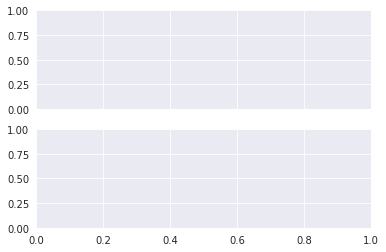

In [166]:
Séries_Históricas_Exp_Imp_Brasil.plot(y=["Exportação","Importação"],width=2.0,subplots=True,xTitle="Date", yTitle="Price ($)", title="OHLC Price From Apr,2019 - Mar,2020")

In [ ]:
Mês_Exp_Brasil.head()

#### **6.3 - Séries Históricas Exportações - Dividido por meses (2016-2020)**

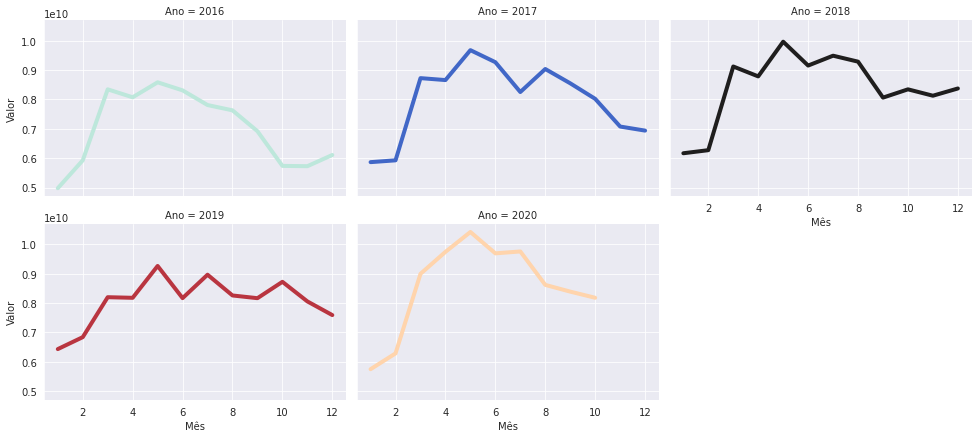

In [54]:
sns.set_style('darkgrid')
g = sns.relplot(data=Mês_Exp_Brasil,x="Mês", y="Valor", col="Ano", hue="Ano",kind="line", palette="icefire", linewidth=4,col_wrap=3, height=3, aspect=1.5, legend=False)

In [207]:
fig = px.scatter(Mês_Exp_Brasil, x='Mês', y='Valor',size='Valor', hover_data=['Ano'])
fig.show()